## Gradient Descent and Backpropagation

In this assignment, we will learn about gradient descent and backpropagation algorithms. We will create a neural network and tweak some of the parameters in SGD.

In [1]:
import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

Let's use the data we processed in the titanic assigment and load it below.

In [2]:
titanic = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic_processed.csv')

In [3]:
titanic.head()

,Survived,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,0,1,0,1,0,0,1
1,1,1,0,1,0,0,1,0,1,0,0
2,1,0,0,0,0,1,1,0,0,0,1
3,1,1,0,1,0,0,1,0,0,0,1
4,0,0,0,0,0,1,0,1,0,0,1


Split the data into train and test with 20% of data in test.

In [4]:
# Answer below
from sklearn.model_selection import train_test_split

X = titanic.drop(['Survived'], axis=1)
y = titanic.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
X_train.shape[1]

10

Create a model with 5 layers - The first layer should be of unit size 128 and input shape with the shape of the input and the last layer should be of size 1. The hidden layers should be of size 64, 32, and 32, respectively. Use a sigmoid activation.

In [6]:
def build_model(opt='adam'):
  model = Sequential()
  model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(32, activation='relu'))
  #last layer/output
  model.add(Dense(1, activation='sigmoid'))

  #compile model
  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

  return model

Initialize an SGD optimizer with learning rate 0.05. Note that in older versions of keras, we use `lr` instead of `learning_rate`.

In [7]:
# Answer below:
sgd = SGD(learning_rate=0.05)

compile and fit the model using the optimizer you initialized above. Use a batch size of 100 and 50 epochs

In [11]:
# Answer below
model_sgd = build_model(opt=sgd)

hist_sgd = model_sgd.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=50, verbose=1)

Epoch 1/50
8/8 [==============================] - 1s 41ms/step - loss: 0.6921 - accuracy: 0.5480 - val_loss: 0.6575 - val_accuracy: 0.6798
Epoch 2/50
8/8 [==============================] - 0s 8ms/step - loss: 0.6565 - accuracy: 0.6317 - val_loss: 0.6399 - val_accuracy: 0.6629
Epoch 3/50
8/8 [==============================] - 0s 8ms/step - loss: 0.6331 - accuracy: 0.6442 - val_loss: 0.6278 - val_accuracy: 0.6798
Epoch 4/50
8/8 [==============================] - 0s 8ms/step - loss: 0.6230 - accuracy: 0.6602 - val_loss: 0.6122 - val_accuracy: 0.7135
Epoch 5/50
8/8 [==============================] - 0s 7ms/step - loss: 0.6078 - accuracy: 0.6776 - val_loss: 0.5950 - val_accuracy: 0.7640
Epoch 6/50
8/8 [==============================] - 0s 8ms/step - loss: 0.5950 - accuracy: 0.7273 - val_loss: 0.5770 - val_accuracy: 0.7697
Epoch 7/50
8/8 [==============================] - 0s 7ms/step - loss: 0.5691 - accuracy: 0.7556 - val_loss: 0.5543 - val_accuracy: 0.7697
Epoch 8/50
8/8 [=================

In [12]:
model_sgd.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.4649 - accuracy: 0.7921


[0.4648505747318268, 0.7921348214149475]

Now use the same batch size, but fit your model using 500 epochs. Is there a difference in performance?

In [13]:
# Answer below:
model_sgd_2 = build_model(opt=sgd)

#fitting
model_sgd_2.fit(X_train, y_train, 
                validation_data=(X_test, y_test), batch_size=100, epochs=500, verbose=1)

Epoch 1/500
8/8 [==============================] - 1s 32ms/step - loss: 0.6780 - accuracy: 0.6127 - val_loss: 0.6587 - val_accuracy: 0.6124
Epoch 2/500
8/8 [==============================] - 0s 9ms/step - loss: 0.6584 - accuracy: 0.5900 - val_loss: 0.6388 - val_accuracy: 0.6124
Epoch 3/500
8/8 [==============================] - 0s 6ms/step - loss: 0.6228 - accuracy: 0.6296 - val_loss: 0.6217 - val_accuracy: 0.6124
Epoch 4/500
8/8 [==============================] - 0s 8ms/step - loss: 0.6156 - accuracy: 0.6205 - val_loss: 0.6052 - val_accuracy: 0.6124
Epoch 5/500
8/8 [==============================] - 0s 8ms/step - loss: 0.5915 - accuracy: 0.6207 - val_loss: 0.5881 - val_accuracy: 0.6124
Epoch 6/500
8/8 [==============================] - 0s 7ms/step - loss: 0.5821 - accuracy: 0.6181 - val_loss: 0.5719 - val_accuracy: 0.6685
Epoch 7/500
8/8 [==============================] - 0s 7ms/step - loss: 0.5563 - accuracy: 0.6756 - val_loss: 0.5593 - val_accuracy: 0.6966
Epoch 8/500
8/8 [=========

In [14]:
model_sgd_2.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.5765 - accuracy: 0.7809


[0.576540470123291, 0.7808988690376282]

Now use a batch size of 200 and 200 epochs. Have you observed a significant difference in performance?

In [15]:
# Answer below:
model_sgd_3 = build_model(opt=sgd)

#fitting
model_sgd_3.fit(X_train, y_train, 
                validation_data=(X_test, y_test), batch_size=200, epochs=200, verbose=1)

Epoch 1/200
4/4 [==============================] - 1s 73ms/step - loss: 0.7248 - accuracy: 0.2880 - val_loss: 0.7013 - val_accuracy: 0.5562
Epoch 2/200
4/4 [==============================] - 0s 64ms/step - loss: 0.7015 - accuracy: 0.5244 - val_loss: 0.6879 - val_accuracy: 0.5899
Epoch 3/200
4/4 [==============================] - 0s 15ms/step - loss: 0.6856 - accuracy: 0.5999 - val_loss: 0.6795 - val_accuracy: 0.6124
Epoch 4/200
4/4 [==============================] - 0s 15ms/step - loss: 0.6782 - accuracy: 0.6144 - val_loss: 0.6728 - val_accuracy: 0.6124
Epoch 5/200
4/4 [==============================] - 0s 16ms/step - loss: 0.6645 - accuracy: 0.6470 - val_loss: 0.6676 - val_accuracy: 0.6124
Epoch 6/200
4/4 [==============================] - 0s 15ms/step - loss: 0.6611 - accuracy: 0.6334 - val_loss: 0.6624 - val_accuracy: 0.6124
Epoch 7/200
4/4 [==============================] - 0s 14ms/step - loss: 0.6598 - accuracy: 0.6182 - val_loss: 0.6574 - val_accuracy: 0.6124
Epoch 8/200
4/4 [===

In [16]:
model_sgd_3.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.4782 - accuracy: 0.7978


[0.47815394401550293, 0.7977527976036072]

Now create a model with 7 layers. The model should have an input layer with unit size 128, then hidden layers of size 128, 64, 64, 32, 32, and an output layer of size 1. Use a sigmoid activation.

In [18]:
# Answer below
def model_build(opt='adam'):
  model = Sequential()
  model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(32, activation='relu'))
  #last layer/output
  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

  return model

Fit and compile the model using the SGD optimizer you previously defined, batch size = 80 and epochs = 200

In [19]:
# Answer below:
model_sgd_4 = model_build(opt=sgd)

#fitting
model_sgd_4.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=80, epochs=200)

Epoch 1/200
9/9 [==============================] - 1s 29ms/step - loss: 0.6826 - accuracy: 0.6118 - val_loss: 0.6726 - val_accuracy: 0.6124
Epoch 2/200
9/9 [==============================] - 0s 7ms/step - loss: 0.6681 - accuracy: 0.6136 - val_loss: 0.6619 - val_accuracy: 0.6124
Epoch 3/200
9/9 [==============================] - 0s 7ms/step - loss: 0.6578 - accuracy: 0.6172 - val_loss: 0.6516 - val_accuracy: 0.6124
Epoch 4/200
9/9 [==============================] - 0s 7ms/step - loss: 0.6428 - accuracy: 0.6253 - val_loss: 0.6410 - val_accuracy: 0.6124
Epoch 5/200
9/9 [==============================] - 0s 7ms/step - loss: 0.6267 - accuracy: 0.6493 - val_loss: 0.6303 - val_accuracy: 0.6124
Epoch 6/200
9/9 [==============================] - 0s 7ms/step - loss: 0.6251 - accuracy: 0.6225 - val_loss: 0.6183 - val_accuracy: 0.6124
Epoch 7/200
9/9 [==============================] - 0s 7ms/step - loss: 0.6176 - accuracy: 0.6102 - val_loss: 0.6033 - val_accuracy: 0.6124
Epoch 8/200
9/9 [=========

In [20]:
model_sgd_4.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.5378 - accuracy: 0.7921


[0.5378053188323975, 0.7921348214149475]

Define a new SGD optimizer with a learning rate of 0.001

In [21]:
# Answer below:
sgd = SGD(learning_rate=0.001)

Fit and compile the model using this SGD optimizer, batch size = 80 and epochs = 200. Compare to previous results. What do you think went wrong and why?

In [26]:
# Answer below:
model_sgd_5 = model_build(opt=sgd)

#fitting
model_sgd_5.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=80, epochs=200)

Epoch 1/200
9/9 [==============================] - 1s 28ms/step - loss: 0.6913 - accuracy: 0.6784 - val_loss: 0.6920 - val_accuracy: 0.6348
Epoch 2/200
9/9 [==============================] - 0s 8ms/step - loss: 0.6912 - accuracy: 0.6655 - val_loss: 0.6917 - val_accuracy: 0.6292
Epoch 3/200
9/9 [==============================] - 0s 6ms/step - loss: 0.6914 - accuracy: 0.6462 - val_loss: 0.6914 - val_accuracy: 0.5955
Epoch 4/200
9/9 [==============================] - 0s 7ms/step - loss: 0.6908 - accuracy: 0.6179 - val_loss: 0.6910 - val_accuracy: 0.5730
Epoch 5/200
9/9 [==============================] - 0s 7ms/step - loss: 0.6904 - accuracy: 0.6396 - val_loss: 0.6907 - val_accuracy: 0.5787
Epoch 6/200
9/9 [==============================] - 0s 7ms/step - loss: 0.6893 - accuracy: 0.6415 - val_loss: 0.6904 - val_accuracy: 0.5843
Epoch 7/200
9/9 [==============================] - 0s 7ms/step - loss: 0.6898 - accuracy: 0.6311 - val_loss: 0.6901 - val_accuracy: 0.5955
Epoch 8/200
9/9 [=========

In [27]:
model_sgd_5.evaluate(X_test, y_test)

#learning rate is too low for the data

6/6 [==============================] - 0s 2ms/step - loss: 0.6561 - accuracy: 0.6124


[0.6561112403869629, 0.6123595237731934]

Look at the prediction for the training and test data. Print the confusion matrix for the test data.

In [34]:
# Answer below:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

#plotting cm function
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [36]:
#predicting training data
model_sgd_5.predict(X_train).flatten()

array([0.44740722, 0.44115835, 0.41733074, 0.37898925, 0.39843845,
       0.41481158, 0.41733074, 0.41733074, 0.41733074, 0.4291212 ,
       0.41370592, 0.4123075 , 0.4257439 , 0.42973736, 0.43994564,
       0.41370592, 0.4166522 , 0.4291212 , 0.41733074, 0.4510246 ,
       0.43319786, 0.4163151 , 0.41221038, 0.44240224, 0.4291212 ,
       0.41733074, 0.41733074, 0.43319786, 0.41733074, 0.43202955,
       0.44563866, 0.4407191 , 0.41733074, 0.44907045, 0.4306723 ,
       0.4407191 , 0.40808153, 0.41370592, 0.43994564, 0.41370592,
       0.41733074, 0.42476994, 0.41733074, 0.44924197, 0.45346266,
       0.44240224, 0.44924197, 0.41370592, 0.4291212 , 0.44115835,
       0.44240224, 0.4458996 , 0.43994564, 0.4306723 , 0.41733074,
       0.37433338, 0.4306723 , 0.4306723 , 0.41481158, 0.4463578 ,
       0.41370592, 0.39685154, 0.4358158 , 0.43202955, 0.4456387 ,
       0.4166522 , 0.44240224, 0.43616197, 0.43994564, 0.41370592,
       0.4291212 , 0.41733074, 0.41370592, 0.41733074, 0.43202

In [28]:
model_sgd_5.predict(X_test).flatten()
#flattens the 1 column

array([0.41733074, 0.45871714, 0.44115835, 0.41370592, 0.43974814,
       0.41733074, 0.41370592, 0.41733074, 0.46049374, 0.4456387 ,
       0.41370592, 0.43324757, 0.41733074, 0.42763746, 0.41733074,
       0.41733074, 0.44056723, 0.43202955, 0.44435388, 0.41733074,
       0.40466988, 0.4458996 , 0.4247805 , 0.4407191 , 0.41733074,
       0.4407191 , 0.4346317 , 0.44480705, 0.4291212 , 0.41370592,
       0.4291212 , 0.43994564, 0.41733074, 0.4407191 , 0.42696232,
       0.43319786, 0.43832767, 0.4407191 , 0.43202955, 0.41733074,
       0.41370592, 0.43324757, 0.41370592, 0.41733074, 0.4291212 ,
       0.4407191 , 0.45653433, 0.41733074, 0.41370592, 0.4463578 ,
       0.4448999 , 0.43994564, 0.41733074, 0.4123075 , 0.45127547,
       0.44924197, 0.45035776, 0.41733074, 0.41733074, 0.41370592,
       0.41481158, 0.43908185, 0.45443797, 0.41733074, 0.44924197,
       0.41370592, 0.41733074, 0.41733074, 0.46049374, 0.4456387 ,
       0.41370592, 0.45871714, 0.4486899 , 0.41733074, 0.43324

In [29]:
# y predictions for last model fitted
y_pred = pd.Series((model_sgd_5.predict(X_test) > 0.5).flatten().astype("int32"))
y_pred

0      0
1      0
2      0
3      0
4      0
      ..
173    0
174    0
175    0
176    0
177    0
Length: 178, dtype: int32

Confusion matrix, without normalization
[[109   0]
 [ 69   0]]


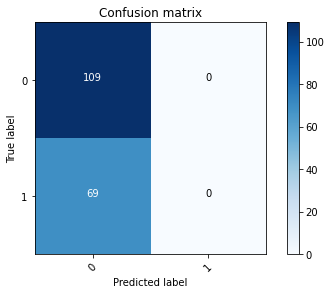

In [35]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

plot_confusion_matrix(cm, classes=[0,1])